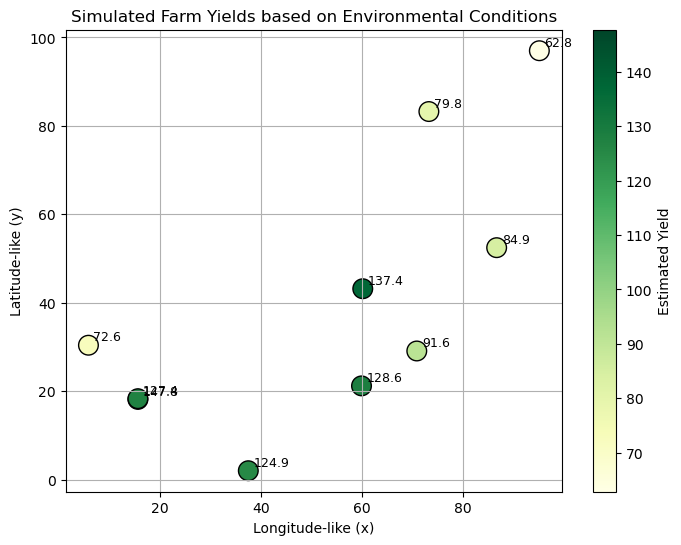

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 가상의 농지 데이터 생성
np.random.seed(42)
num_farms = 10
x = np.random.uniform(0, 100, size=num_farms)   # 경도 유사값
y = np.random.uniform(0, 100, size=num_farms)   # 위도 유사값
temperature = np.random.uniform(15, 35, size=num_farms)  # 섭씨
rainfall = np.random.uniform(50, 200, size=num_farms)    # mm

# 2. 작물 생산량: 임의의 선형 모델 + noise
# 생산량 = 2*온도 + 0.5*강수량 + noise
true_weights = np.array([2.0, 0.5])
features = np.column_stack((temperature, rainfall))
noise = np.random.normal(0, 10, size=num_farms)
yield_est = features @ true_weights + noise

# 3. DataFrame 생성
df = pd.DataFrame({
    'x': x,
    'y': y,
    'Temperature': temperature,
    'Rainfall': rainfall,
    'Yield': yield_est
})

# 4. 시각화
plt.figure(figsize=(8, 6))
sc = plt.scatter(df['x'], df['y'], c=df['Yield'], cmap='YlGn', s=200, edgecolor='k')
plt.colorbar(sc, label='Estimated Yield')
plt.xlabel('Longitude-like (x)')
plt.ylabel('Latitude-like (y)')
plt.title('Simulated Farm Yields based on Environmental Conditions')

# 값 출력 (디버깅용)
for i in range(len(df)):
    plt.text(df['x'][i]+1, df['y'][i]+1, f"{df['Yield'][i]:.1f}", fontsize=9)

plt.grid(True)
plt.show()


In [1]:
import folium

# 간단한 지도 생성 (창원시 중심)
m = folium.Map(location=[35.2285, 128.6811], zoom_start=12)
m


In [3]:
import folium
import numpy as np
import pandas as pd

# 1. 농지 위치 및 작물 설정 (산지 가정)
farms = [
    {"name": "산지 밭 A", "lat": 35.238, "lon": 128.691, "crop": "고구마"},
    {"name": "산지 밭 B", "lat": 35.245, "lon": 128.676, "crop": "사과"},
    {"name": "산지 밭 C", "lat": 35.233, "lon": 128.661, "crop": "블루베리"},
    {"name": "산지 밭 D", "lat": 35.221, "lon": 128.673, "crop": "배추"},
    {"name": "산지 밭 E", "lat": 35.225, "lon": 128.699, "crop": "체리"},
]

# 2. 가상의 환경조건 변수 설정
np.random.seed(42)
n = len(farms)

sunlight = np.random.uniform(5, 10, n)      # 일조 시간 (hr/day)
moisture = np.random.uniform(30, 70, n)     # 토양 수분 (%)
slope = np.random.uniform(10, 30, n)        # 경사도 (%)
altitude = np.random.uniform(100, 400, n)   # 고도 (m)

# 작물별 보정값 (환경에 따라 생산성 가중치)
crop_factor = {
    "고구마": 5.0,
    "배추": 3.0,
    "사과": 7.0,
    "블루베리": 9.0,
    "체리": 6.0
}

# 3. 생산량 예측 모델 (가상의 간단한 선형식)
a1, a2, a3, a4 = 10, 0.5, 1.0, 0.1  # 가중치
yield_pred = []
for i, farm in enumerate(farms):
    base = (
        a1 * sunlight[i]
        + a2 * moisture[i]
        - a3 * slope[i]
        - a4 * altitude[i]
        + crop_factor[farm["crop"]]
        + np.random.normal(0, 3)  # 노이즈
    )
    yield_pred.append(max(base, 0))  # 음수 방지

# 4. DataFrame 구성
df = pd.DataFrame(farms)
df["Sunlight"] = sunlight
df["Moisture"] = moisture
df["Slope"] = slope
df["Altitude"] = altitude
df["Yield"] = yield_pred

# 5. 지도 생성
m = folium.Map(location=[35.2285, 128.6811], zoom_start=12)

# 6. 마커 표시
for _, row in df.iterrows():
    color = "green" if row["Yield"] > 50 else "orange" if row["Yield"] > 30 else "red"
    popup_text = (
        f"{row['name']} ({row['crop']})<br>"
        f"☀️ 일조: {row['Sunlight']:.1f} h<br>"
        f"💧 수분: {row['Moisture']:.1f}%<br>"
        f"🏔 경사: {row['Slope']:.1f}%<br>"
        f"⛰ 고도: {row['Altitude']:.0f} m<br>"
        f"🌾 생산량: {row['Yield']:.1f}"
    )
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=9,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(m)

m
